calculate band structure with TNN TB modle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get parameters from the FP calculation
para = pd.read_csv('~/OneDrive - connect.hku.hk/capstone/tnn_para.csv')

In [3]:
# define the function to calculate the band structure
def structure(e1, e2, t0, t1, t2, t11, t12, t22, r0, r1, r2, r11, r12, u0, u1, u2, u11, u12, u22):

    # the typical cross section in the first Brillouin zone
    kx1 = np.linspace(0, 4*np.pi/3, 1990)
    kx2 = np.linspace(4*np.pi/3, np.pi, 990)
    kx3 = np.linspace(np.pi, 0, 1730)
    kx = np.concatenate((kx1, kx2, kx3))
    ky1 = np.linspace(0, 0, 1990)
    ky2 = np.linspace(0, np.pi/np.sqrt(3), 990)
    ky3 = np.linspace(np.pi/np.sqrt(3), 0, 1730)
    ky = np.concatenate((ky1, ky2, ky3))

    X = 1/2*kx
    Y = np.sqrt(3)/2*ky

    # build the Hamiltonian matrix
    v0 = e1 + 2*t0*(2*np.cos(X)*np.cos(Y) + np.cos(2*X)) + 2*r0*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2*u0*(2*np.cos(2*X)*np.cos(2*Y) + np.cos(4*X))
    rv1 = - 2*np.sqrt(3)*t2*np.sin(X)*np.sin(Y) + 2*(r1 + r2)*np.sin(3*X)*np.sin(Y) - 2*np.sqrt(3)*u2*np.sin(2*X)*np.sin(2*Y)
    iv1 = 2*t1*np.sin(X)*(2*np.cos(X) + np.cos(Y)) + 2*(r1 - r2)*np.sin(3*X)*np.cos(Y) + 2*u1*np.sin(2*X)*(2*np.cos(2*X) + np.cos(2*Y))
    rv2 = 2*t2*(np.cos(2*X) - np.cos(X)*np.cos(Y)) - 2/np.sqrt(3)*(r1 + r2)*(np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + 2*u2*(np.cos(4*X) - np.cos(2*X)*np.cos(2*Y))
    iv2 = 2*np.sqrt(3)*t1*np.cos(X)*np.sin(Y) + 2/np.sqrt(3)*np.sin(Y)*(r1 - r2)*(np.cos(3*X) + 2*np.cos(Y)) + 2*np.sqrt(3)*u1*np.cos(2*X)*np.sin(2*Y)
    v11 = e2 + (t11 + 3*t22)*np.cos(X)*np.cos(Y) + 2*t11*np.cos(2*X) + 4*r11*np.cos(3*X)*np.cos(Y) + 2*(r11 + np.sqrt(3)*r12)*np.cos(2*Y) + (u11 + 3*u22)*np.cos(2*X)*np.cos(2*Y) + 2*u11*np.cos(4*X)
    rv12 = np.sqrt(3)*(t22 - t11)*np.sin(X)*np.sin(Y) + 4*r12*np.sin(3*X)*np.sin(Y) + np.sqrt(3)*(u22 - u11)*np.sin(2*X)*np.sin(2*Y)
    iv12 = 4*t12*np.sin(X)*(np.cos(X) - np.cos(Y)) + 4*u12*np.sin(2*X)*(np.cos(2*X) - np.cos(2*Y))
    v22 = e2 + (3*t11 + t22)*np.cos(X)*np.cos(Y) + 2*t22*np.cos(2*X) + 2*r11*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2/np.sqrt(3)*r12*(4*np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + (3*u11 + u22)*np.cos(2*X)*np.cos(2*Y) + 2*u22*np.cos(4*X)

    ham = np.array([[v0, rv1 + 1j*iv1, rv2 + 1j*iv2], [rv1 - 1j*iv1, v11, rv12 + 1j*iv12], [rv2 - 1j*iv2, rv12 - 1j*iv12, v22]])

    # calculate the eigenvalues
    # the eigenvalues are stored in the array 'eig'
    eig = np.array([0, 0, 0])
    for i in range(4710):
        eigenvalue = np.real(np.linalg.eigvals(ham[:,:,i]))
        eigenvalue = np.sort(eigenvalue)
        eig = np.vstack((eig, eigenvalue))
    eig = eig[1:,:]

    return eig

In [4]:
# calculate the band structure for differnet materials
bands = []
for i in range(12):
    band = structure(para['e1'][i], para['e2'][i], para['t0'][i], para['t1'][i], para['t2'][i], para['t11'][i], para['t12'][i], para['t22'][i], para['r0'][i], para['r1'][i], para['r2'][i], para['r11'][i], para['r12'][i], para['u0'][i], para['u1'][i], para['u2'][i], para['u11'][i], para['u12'][i], para['u22'][i])
    bands.append(band)

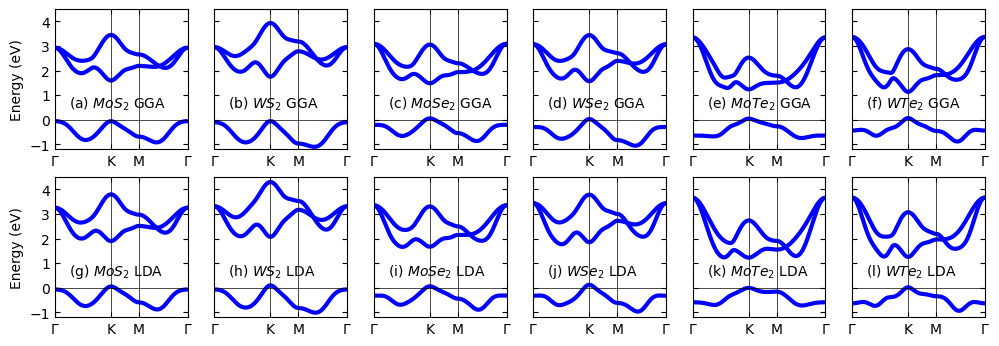

In [6]:
# plot the band structure
fig, ax = plt.subplots(2, 6, figsize=(12, 4))

ax[0,0].plot(bands[0], color='blue', linewidth=3)
ax[0,0].set_xlim(0, 1470)
ax[0,0].set_ylim(-1.2, 4.5)
ax[0,0].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
ax[0,0].set_yticks([-1, 0, 1, 2, 3, 4])
ax[0,0].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
ax[0,0].hlines([0], 0, 4710, colors='black', linewidth=0.5)
ax[0,0].tick_params(top=True, right=True, direction='in', labelleft=True, labelsize=10)
ax[0,0].set_ylabel('Energy (eV)', fontsize=10)

ax[1,0].plot(bands[6], color='blue', linewidth=3)
ax[1,0].set_xlim(0, 1470)
ax[1,0].set_ylim(-1.2, 4.5)
ax[1,0].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
ax[1,0].set_yticks([-1, 0, 1, 2, 3, 4])
ax[1,0].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
ax[1,0].hlines([0], 0, 4710, colors='black', linewidth=0.5)
ax[1,0].tick_params(top=True, right=True, direction='in', labelleft=True, labelsize=10)
ax[1,0].set_ylabel('Energy (eV)', fontsize=10)

for j in range(0, 2):
    for i in range(1, 6):
        ax[j, i].plot(bands[i+6*j], color='blue', linewidth=3)
        ax[j, i].set_xlim(0, 1470)
        ax[j, i].set_ylim(-1.2, 4.5)
        ax[j, i].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
        ax[j, i].set_yticks([-1, 0, 1, 2, 3, 4])
        ax[j, i].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
        ax[j, i].hlines([0], 0, 4710, colors='black', linewidth=0.5)
        ax[j, i].tick_params(top=True, right=True, direction='in', labelleft=False, labelsize=10)

# add labels
ax[0,0].text(500, 0.5, '(a) $MoS_2$ GGA', fontsize=10)
ax[0,1].text(500, 0.5, '(b) $WS_2$ GGA', fontsize=10)
ax[0,2].text(500, 0.5, '(c) $MoSe_2$ GGA', fontsize=10)
ax[0,3].text(500, 0.5, '(d) $WSe_2$ GGA', fontsize=10)
ax[0,4].text(500, 0.5, '(e) $MoTe_2$ GGA', fontsize=10)
ax[0,5].text(500, 0.5, '(f) $WTe_2$ GGA', fontsize=10)
ax[1,0].text(500, 0.5, '(g) $MoS_2$ LDA', fontsize=10)
ax[1,1].text(500, 0.5, '(h) $WS_2$ LDA', fontsize=10)
ax[1,2].text(500, 0.5, '(i) $MoSe_2$ LDA', fontsize=10)
ax[1,3].text(500, 0.5, '(j) $WSe_2$ LDA', fontsize=10)
ax[1,4].text(500, 0.5, '(k) $MoTe_2$ LDA', fontsize=10)
ax[1,5].text(500, 0.5, '(l) $WTe_2$ LDA', fontsize=10)

plt.show()

In [10]:
bands[0].shape

(4710, 3)

In [11]:
bands[0]

array([[-0.061     ,  2.92637684,  2.92637684],
       [-0.06100063,  2.92637308,  2.92637523],
       [-0.06100251,  2.92636178,  2.92637042],
       ...,
       [-0.06100249,  2.9263619 ,  2.92637047],
       [-0.06100062,  2.9263731 ,  2.92637525],
       [-0.061     ,  2.92637684,  2.92637684]])

In [15]:
np.max(bands[0][:,0])

-0.06099999999999983

In [18]:
np.min(bands[1][:,1])-np.max(bands[1][:,0])

1.8062354542693322